In [51]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
from scipy.stats import pearsonr


In [2]:
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Stock price analysis 2019

In [3]:
stock_list=[]

for stock in ['ADPL_2019.csv','ADRS_2019.csv','ARNT_2019.csv','ATGR_2019.csv','ATPL_2019.csv','ERNT_2019.csv',
              'HT-2019.csv','KOEI_2019.csv','PODR_2019.csv','RIVP_2019.csv']:
    df_tmp = pd.read_csv(stock, delimiter=';', decimal=',')
    df_tmp['date'] = pd.to_datetime(df_tmp['date'])
    df_tmp = df_tmp.set_index('date')
    df_tmp = df_tmp.sort_index()
    df_tmp = df_tmp['last_price'].to_frame().rename(columns={'last_price':stock[:-4]})
    
    print(len(df_tmp))
    
    stock_list.append(df_tmp)
    

244
243
206
231
239
238
247
194
243
247


In [4]:
df = pd.concat(stock_list, axis=1)

<AxesSubplot:xlabel='date'>

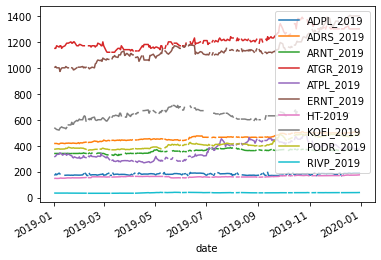

In [5]:
df.plot() #wo filled data

<AxesSubplot:xlabel='date'>

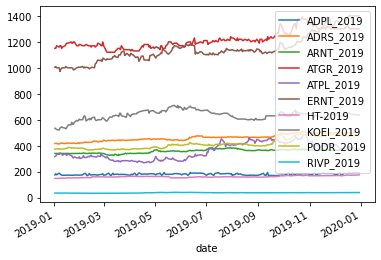

In [6]:
df.interpolate(method='linear').plot()

In [7]:
df=df.interpolate(method='linear')

<AxesSubplot:xlabel='date'>

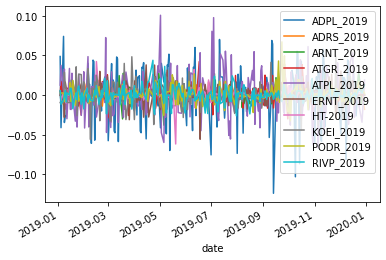

In [122]:
returns19=df.pct_change()
returns19.plot()

In [9]:
volatility19=df.pct_change().std()
volatility19.to_frame()#.plot(kind='scatter')

,0
ADPL_2019,0.028401
ADRS_2019,0.005917
ARNT_2019,0.007862
ATGR_2019,0.010788
ATPL_2019,0.025514
ERNT_2019,0.010683
HT-2019,0.007119
KOEI_2019,0.013376
PODR_2019,0.010027
RIVP_2019,0.009412


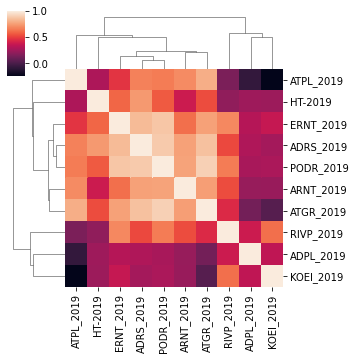

In [10]:
sns.clustermap(df.corr(method='spearman'),figsize=(5,5))

# Beta calculation 2019

In [11]:
CROBEX_2019=pd.read_csv('CROBEX-2019.csv',delimiter=';', decimal=',')
CROBEX10_2019=pd.read_csv('CROBEX10-2019.csv',delimiter=';', decimal=',')#još dodaj german bonds

In [12]:
returns=df.pct_change().fillna(0)

In [13]:
CROBEX_2019['date'] = pd.to_datetime(CROBEX_2019['date'])
CROBEX_2019= CROBEX_2019.set_index('date')
CROBEX_2019= CROBEX_2019.sort_index()

In [14]:
CROBEX10_2019['date'] = pd.to_datetime(CROBEX10_2019['date'])
CROBEX10_2019 = CROBEX10_2019.set_index('date')
CROBEX10_2019= CROBEX10_2019.sort_index()

In [15]:
returns['crobex_last_value'] = CROBEX_2019['last_value']
returns['crobex10_last_value'] = CROBEX10_2019['last_value']

<AxesSubplot:xlabel='date'>

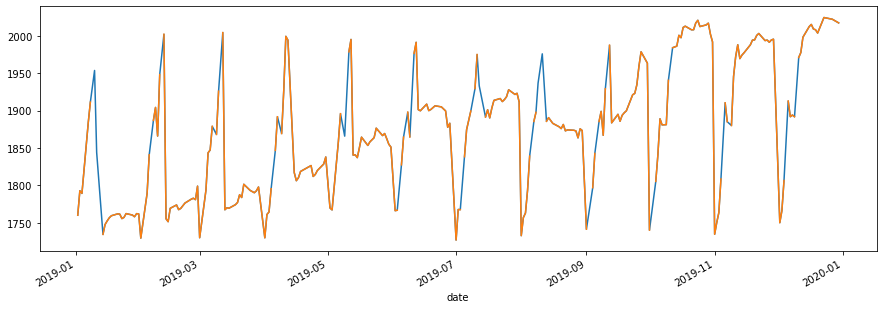

In [16]:
returns['crobex_last_value'].interpolate(method="linear").plot(figsize=(15,5))
returns['crobex_last_value'].plot()

<AxesSubplot:xlabel='date'>

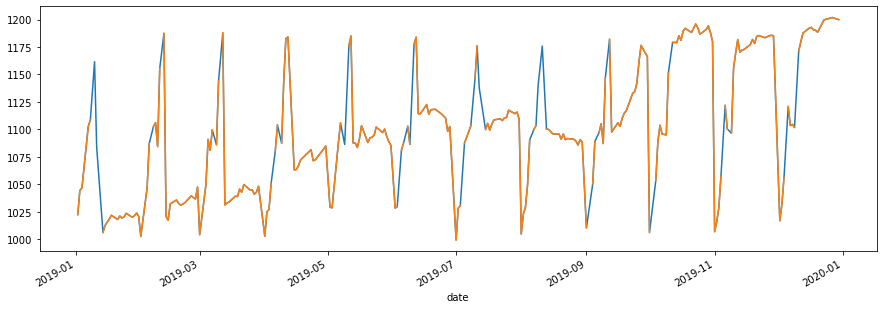

In [17]:
returns['crobex10_last_value'].interpolate(method="linear").plot(figsize=(15,5))
returns['crobex10_last_value'].plot()

In [18]:
returns['crobex_last_value']=returns['crobex_last_value'].interpolate(method="linear")
returns['crobex10_last_value']=returns['crobex10_last_value'].interpolate(method="linear")

In [19]:
X = returns[['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019','KOEI_2019','PODR_2019','RIVP_2019']]
y = returns['crobex_last_value'].pct_change().fillna(0)#sad imam previse returnsa
model = LinearRegression()
model.fit(X,y)
model.coef_ 

array([ 0.48616683,  0.2014393 ,  0.0044338 ,  0.1107592 ,  0.040767  ,
       -0.04587807, -0.06400277,  0.04717065,  0.06429012,  0.03018514])

In [20]:
X = returns[['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019','KOEI_2019','PODR_2019','RIVP_2019']]
y = returns['crobex10_last_value'].pct_change().fillna(0)
model = LinearRegression()
model.fit(X,y)
model.coef_ 

array([ 0.5536145 ,  0.30551012,  0.03964138,  0.09212541,  0.02806533,
       -0.0350979 , -0.07781321,  0.10335481,  0.10945489,  0.05711681])

In [21]:
w=np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
beta_crobex=np.array([0.48616683,  0.2014393 ,  0.0044338 ,  0.1107592 ,  0.040767  ,
       -0.04587807, -0.06400277,  0.04717065,  0.06429012,  0.03018514])
beta_crobex10=np.array([ 0.5536145 ,  0.30551012,  0.03964138,  0.09212541,  0.02806533,
       -0.0350979 , -0.07781321,  0.10335481,  0.10945489,  0.05711681])


In [22]:
portfolio_beta_crobex=np.dot(w,beta_crobex)
portfolio_beta_crobex10=np.dot(w,beta_crobex10)

In [23]:
portfolio_beta_crobex


0.08753311999999999

In [24]:
portfolio_beta_crobex10

0.11759721400000002

In [124]:
bond19=pd.read_csv('Bond_prices_2019.csv',delimiter=',', decimal=',')
bond19.drop(['DATAFLOW','LAST UPDATE','freq','int_rt','geo','OBS_FLAG'],inplace=True, axis=1)
bond19.head()

,TIME_PERIOD,OBS_VALUE
0,2019-01-01,0.49000
1,2019-01-02,0.43000
2,2019-01-03,0.43000
3,2019-01-04,0.49000
4,2019-01-07,0.50000


In [125]:
bond21=pd.read_csv('Bond_prices_2021.csv',delimiter=',', decimal=',')
bond21.drop(['DATAFLOW','LAST UPDATE','freq','int_rt','geo','OBS_FLAG'],inplace=True, axis=1)
bond21.head()

,TIME_PERIOD,OBS_VALUE
0,2021-01-01,-0.43000
1,2021-01-04,-0.46000
2,2021-01-05,-0.42000
3,2021-01-06,-0.40000
4,2021-01-07,-0.41000


In [126]:
bond19.rename(columns = {'TIME_PERIOD':'date', 'OBS_VALUE':'price'}, inplace = True)
bond21.rename(columns = {'TIME_PERIOD':'date', 'OBS_VALUE':'price'}, inplace = True)

In [127]:
bond19['date'] = pd.to_datetime(bond19['date'])
bond19= bond19.set_index('date')
bond19= bond19.sort_index()#nesto s ovim nije oke

In [128]:
bond21['date'] = pd.to_datetime(bond21['date'])
bond21= bond21.set_index('date')
bond21= bond21.sort_index()

In [112]:
returns['bondprices19'] = bond19['price']
returns['bondprices21'] = bond21['price']

ValueError: cannot reindex from a duplicate axis

# Stock price analysis 2021

In [29]:
stock_list=[]

for stock in ['ADPL_2021.csv','ADRS_2021.csv','ARNT_2021.csv','ATGR_2021.csv','ATPL_2021.csv','ERNT_2021.csv','HT-2021.csv','KOEI_2021.csv','PODR_2021.csv','RIVP_2021.csv']:
    df_tmp = pd.read_csv(stock, delimiter=';', decimal=',')
    df_tmp['date'] = pd.to_datetime(df_tmp['date'])
    df_tmp = df_tmp.set_index('date')
    df_tmp = df_tmp.sort_index()
    df_tmp = df_tmp['last_price'].to_frame().rename(columns={'last_price':stock[:-4]})
    
    print(len(df_tmp))
    
    stock_list.append(df_tmp)
    

244
246
202
232
249
247
250
198
246
250


In [30]:
df21= pd.concat(stock_list, axis=1)

<AxesSubplot:xlabel='date'>

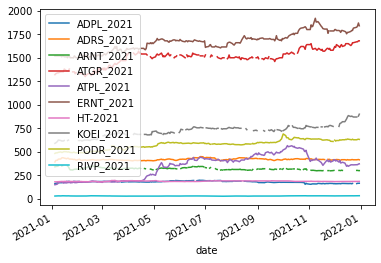

In [31]:
df21.plot()#wo filled data

<AxesSubplot:xlabel='date'>

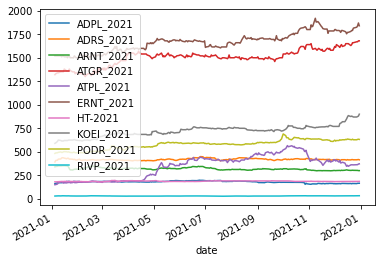

In [32]:
df21.interpolate(method='linear').plot()

<AxesSubplot:xlabel='date'>

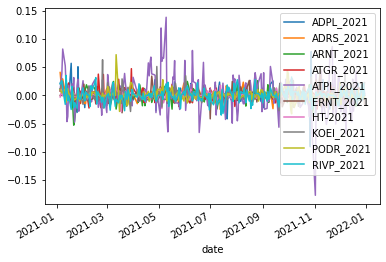

In [33]:
returns21=df21.pct_change() #uredit labels
returns21.plot()

In [34]:
df21=df21.interpolate(method='linear')

In [35]:
volatility21=df21.pct_change().std()
volatility21.to_frame()

,0
ADPL_2021,0.013959
ADRS_2021,0.009156
ARNT_2021,0.010136
ATGR_2021,0.010246
ATPL_2021,0.032458
ERNT_2021,0.009185
HT-2021,0.005712
KOEI_2021,0.010603
PODR_2021,0.009451
RIVP_2021,0.011923


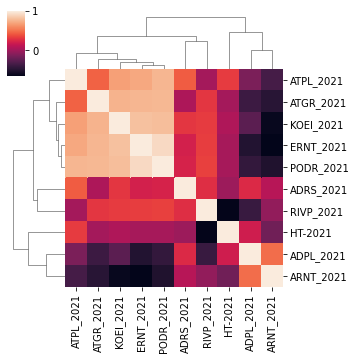

In [36]:
sns.clustermap(df21.corr(method='spearman'),figsize=(5,5))

# Beta calculation 2021


In [37]:
CROBEX_2021=pd.read_csv('CROBEX-2021.csv',delimiter=';', decimal=',')
CROBEX10_2021=pd.read_csv('CROBEX10-2021.csv',delimiter=';', decimal=',')#još dodaj german bonds

In [38]:
returns21=df21.pct_change().fillna(0)

In [39]:
CROBEX_2021['date'] = pd.to_datetime(CROBEX_2021['date'])
CROBEX_2021 = CROBEX_2021.set_index('date')
CROBEX_2021= CROBEX_2021.sort_index()
CROBEX_2021.head()

,mic,symbol,isin,open_value,high_value,low_value,last_value,change_prev_close_percentage,turnover
date,,,,,,,,,
2021-01-02,XZAG,CBX,HRZB00ICBEX6,1787.19,1795.21,1785.02,1793.10,0.38,3208175.14
2021-01-03,XZAG,CBX,HRZB00ICBEX6,1830.19,1835.72,1828.24,1829.88,-0.02,2681397.76
2021-01-04,XZAG,CBX,HRZB00ICBEX6,1872.22,1880.43,1872.08,1876.58,0.23,3546018.80
2021-01-06,XZAG,CBX,HRZB00ICBEX6,1933.86,1945.33,1933.86,1944.66,0.61,2954010.58
2021-01-07,XZAG,CBX,HRZB00ICBEX6,1982.71,1982.71,1958.28,1971.32,-0.46,7534773.84


In [40]:
CROBEX10_2021['date'] = pd.to_datetime(CROBEX10_2021['date'])
CROBEX10_2021 = CROBEX10_2021.set_index('date')
CROBEX10_2021= CROBEX10_2021.sort_index()
CROBEX10_2021.head()

,mic,symbol,isin,open_value,high_value,low_value,last_value,change_prev_close_percentage,turnover
date,,,,,,,,,
2021-01-02,XZAG,CBX10,HRZB00ICBE11,1117.06,1122.59,1117.06,1120.53,0.42,2080121.40
2021-01-03,XZAG,CBX10,HRZB00ICBE11,1132.58,1137.36,1132.10,1136.37,0.34,1584212.00
2021-01-04,XZAG,CBX10,HRZB00ICBE11,1177.04,1182.27,1176.27,1179.78,0.23,3125657.44
2021-01-06,XZAG,CBX10,HRZB00ICBE11,1198.08,1203.93,1196.82,1202.55,0.48,1885916.54
2021-01-07,XZAG,CBX10,HRZB00ICBE11,1220.37,1220.37,1207.85,1217.68,-0.05,6779058.98


In [41]:
returns21['crobex_last_value'] = CROBEX_2021['last_value']
returns21['crobex10_last_value'] = CROBEX10_2021['last_value']

<AxesSubplot:xlabel='date'>

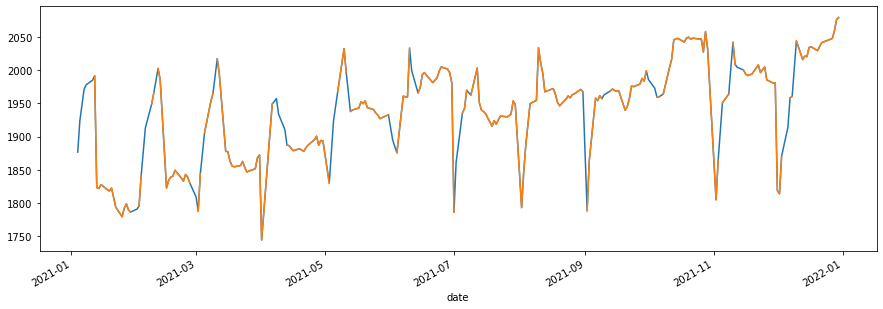

In [42]:
returns21['crobex_last_value'].interpolate(method="linear").plot(figsize=(15,5))
returns21['crobex_last_value'].plot()

<AxesSubplot:xlabel='date'>

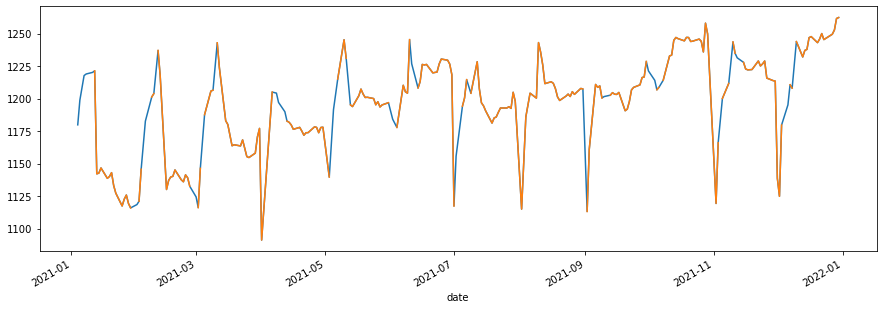

In [43]:
returns21['crobex10_last_value'].interpolate(method="linear").plot(figsize=(15,5))
returns21['crobex10_last_value'].plot()

In [44]:
returns21['crobex_last_value']=returns21['crobex_last_value'].interpolate(method="linear")
returns21['crobex10_last_value']=returns21['crobex10_last_value'].interpolate(method="linear")

In [45]:
X = returns21[['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',
               'KOEI_2021','PODR_2021','RIVP_2021']]
y = returns21['crobex_last_value'].pct_change().fillna(0)
model = LinearRegression()
model.fit(X,y)
model.coef_ 

array([ 0.12601422,  0.08320296,  0.06197496, -0.23955283,  0.14872473,
        0.26897651, -0.03617835,  0.12156757,  0.10556664, -0.03398373])

In [46]:
X = returns21[['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',
               'KOEI_2021','PODR_2021','RIVP_2021']]
y = returns21['crobex10_last_value'].pct_change().fillna(0)
model = LinearRegression()
model.fit(X,y)
model.coef_ 

array([ 0.10430973,  0.06724875,  0.05643697, -0.12350739,  0.1226964 ,
        0.23389701,  0.03161496,  0.1155276 ,  0.11833859, -0.05264083])

In [47]:
w=np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
beta_crobex21=np.array([0.12601422,  0.08320296,  0.06197496, -0.23955283,  0.14872473,
        0.26897651, -0.03617835,  0.12156757,  0.10556664, -0.03398373])
beta_crobex1021=np.array([0.10430973,  0.06724875,  0.05643697, -0.12350739,  0.1226964 ,
        0.23389701,  0.03161496,  0.1155276 ,  0.11833859, -0.05264083])


In [48]:
portfolio_beta_crobex21=np.dot(w,beta_crobex21)
portfolio_beta_crobex1021=np.dot(w,beta_crobex1021)

In [49]:
portfolio_beta_crobex21

0.060631268

In [50]:
portfolio_beta_crobex1021

0.067392179

# Correlation analysis


In [60]:
df.groupby(df.index.month)['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019',
               'KOEI_2019','PODR_2019','RIVP_2019'].std()

<ipython-input-60-aeed1fa466f5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(df.index.month)['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019',


,ADPL_2019,ADRS_2019,ARNT_2019,ATGR_2019,ATPL_2019,ERNT_2019,HT-2019,KOEI_2019,PODR_2019,RIVP_2019
date,,,,,,,,,,
1,4.299716,2.142136,0.526361,16.230216,12.648854,8.861763,1.643069,25.630576,4.203688,0.265351
2,4.739993,4.521447,1.422416,8.796303,7.999117,26.237822,3.232679,10.833750,5.046513,0.393587
3,4.310543,1.948503,5.207792,15.904855,11.958959,19.734997,1.572854,16.085725,2.672918,0.321366
4,4.618568,3.832463,6.521360,17.831583,5.453904,16.876742,0.681870,14.145961,4.881102,1.461200
5,4.430612,4.160140,3.805428,17.083554,10.577983,25.642999,5.146363,20.941386,12.432651,0.739553
6,5.598894,13.316477,4.301163,16.203076,17.478286,28.351185,3.047117,10.653421,6.099310,0.641959
7,5.064160,1.428869,4.108213,13.745882,30.070321,15.678712,1.443650,12.204179,5.850802,0.618169
8,5.001890,1.493949,7.851631,8.381203,17.158257,6.208194,0.489935,7.790276,6.095110,0.602632
9,6.695423,9.484955,2.252168,38.078271,7.777835,23.206582,3.070749,18.861084,31.389185,0.280925


In [61]:
df21.groupby(df21.index.month)['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',
               'KOEI_2021','PODR_2021','RIVP_2021'].std()

<ipython-input-61-d3fecb39d4a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df21.groupby(df21.index.month)['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',


,ADPL_2021,ADRS_2021,ARNT_2021,ATGR_2021,ATPL_2021,ERNT_2021,HT-2021,KOEI_2021,PODR_2021,RIVP_2021
date,,,,,,,,,,
1,7.377162,11.352924,17.942729,15.498538,8.663545,8.719139,1.484324,10.533025,4.910902,0.861014
2,1.537898,3.252529,12.032850,21.853279,4.381480,9.104655,1.444363,14.500454,5.933846,0.987607
3,2.623011,3.516196,4.660404,46.502157,4.687149,27.810411,4.423594,10.153348,16.205328,0.869078
4,1.569445,1.899446,5.227458,20.641042,29.339604,27.867166,1.359905,9.847655,2.617753,0.241214
5,5.037715,5.309470,4.751162,13.719121,32.825150,10.112463,2.758321,8.793683,11.603776,0.445614
6,2.257152,8.886862,7.478058,12.060702,27.244072,6.781360,1.103523,12.698425,2.633789,0.466115
7,4.252832,11.512557,9.445217,14.050003,10.382824,18.685133,1.243381,4.797016,3.214214,1.035516
8,3.162560,5.052581,3.662118,9.128709,27.164928,28.039088,0.669043,11.514742,5.835850,0.484326
9,2.277905,6.296601,2.603694,10.970247,13.890730,11.329386,0.569803,5.012760,16.766541,0.350046


<ipython-input-62-2e0eb5052b35>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plt.scatter(df.groupby(df.index.month)['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019',
<ipython-input-62-2e0eb5052b35>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  'KOEI_2019','PODR_2019','RIVP_2019'].std(),df21.groupby(df21.index.month)['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',


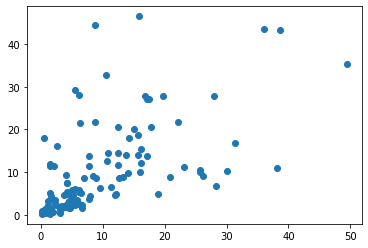

In [62]:
plt.scatter(df.groupby(df.index.month)['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019',
               'KOEI_2019','PODR_2019','RIVP_2019'].std(),df21.groupby(df21.index.month)['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',
               'KOEI_2021','PODR_2021','RIVP_2021'].std())

In [66]:
ADPL=pearsonr(df.groupby(df.index.month)['ADPL_2019'].std(),df21.groupby(df21.index.month)['ADPL_2021'].std())
ADRS=pearsonr(df.groupby(df.index.month)['ADRS_2019'].std(),df21.groupby(df21.index.month)['ADRS_2021'].std())
ARNT=pearsonr(df.groupby(df.index.month)['ARNT_2019'].std(),df21.groupby(df21.index.month)['ARNT_2021'].std())
ATGR=pearsonr(df.groupby(df.index.month)['ATGR_2019'].std(),df21.groupby(df21.index.month)['ATGR_2021'].std())
ATPL=pearsonr(df.groupby(df.index.month)['ATPL_2019'].std(),df21.groupby(df21.index.month)['ATPL_2021'].std())
ERNT=pearsonr(df.groupby(df.index.month)['ERNT_2019'].std(),df21.groupby(df21.index.month)['ERNT_2021'].std())
HT=pearsonr(df.groupby(df.index.month)['HT-2019'].std(),df21.groupby(df21.index.month)['HT-2021'].std())
PODR=pearsonr(df.groupby(df.index.month)['PODR_2019'].std(),df21.groupby(df21.index.month)['PODR_2021'].std())
RIVP=pearsonr(df.groupby(df.index.month)['RIVP_2019'].std(),df21.groupby(df21.index.month)['RIVP_2021'].std()) 
#potencijalno zamijenit funkcijom

In [74]:
df_plot=pd.concat([df.groupby(df.index.month)['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019',
               'KOEI_2019','PODR_2019','RIVP_2019'].std(),df21.groupby(df21.index.month)['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',
               'KOEI_2021','PODR_2021','RIVP_2021'].std()],axis=1)
df_plot.head()

<ipython-input-74-c125b7a5c8b2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_plot=pd.concat([df.groupby(df.index.month)['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019',
<ipython-input-74-c125b7a5c8b2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  'KOEI_2019','PODR_2019','RIVP_2019'].std(),df21.groupby(df21.index.month)['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021',


,ADPL_2019,ADRS_2019,ARNT_2019,ATGR_2019,ATPL_2019,ERNT_2019,HT-2019,KOEI_2019,PODR_2019,RIVP_2019,ADPL_2021,ADRS_2021,ARNT_2021,ATGR_2021,ATPL_2021,ERNT_2021,HT-2021,KOEI_2021,PODR_2021,RIVP_2021
date,,,,,,,,,,,,,,,,,,,,
1,4.299716,2.142136,0.526361,16.230216,12.648854,8.861763,1.643069,25.630576,4.203688,0.265351,7.377162,11.352924,17.942729,15.498538,8.663545,8.719139,1.484324,10.533025,4.910902,0.861014
2,4.739993,4.521447,1.422416,8.796303,7.999117,26.237822,3.232679,10.833750,5.046513,0.393587,1.537898,3.252529,12.032850,21.853279,4.381480,9.104655,1.444363,14.500454,5.933846,0.987607
3,4.310543,1.948503,5.207792,15.904855,11.958959,19.734997,1.572854,16.085725,2.672918,0.321366,2.623011,3.516196,4.660404,46.502157,4.687149,27.810411,4.423594,10.153348,16.205328,0.869078
4,4.618568,3.832463,6.521360,17.831583,5.453904,16.876742,0.681870,14.145961,4.881102,1.461200,1.569445,1.899446,5.227458,20.641042,29.339604,27.867166,1.359905,9.847655,2.617753,0.241214
5,4.430612,4.160140,3.805428,17.083554,10.577983,25.642999,5.146363,20.941386,12.432651,0.739553,5.037715,5.309470,4.751162,13.719121,32.825150,10.112463,2.758321,8.793683,11.603776,0.445614


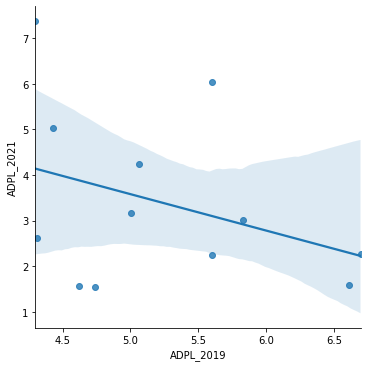

In [75]:
sns.lmplot(x='ADPL_2019',y='ADPL_2021',data=df_plot)

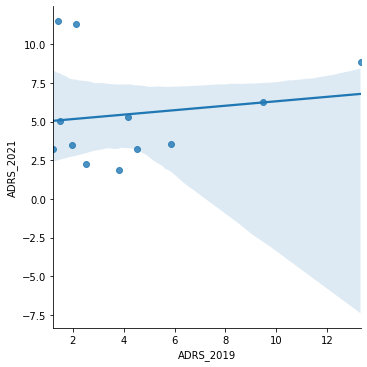

In [76]:
sns.lmplot(x='ADRS_2019',y='ADRS_2021',data=df_plot)

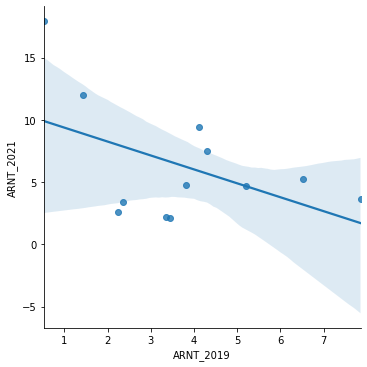

In [77]:
sns.lmplot(x='ARNT_2019',y='ARNT_2021',data=df_plot)

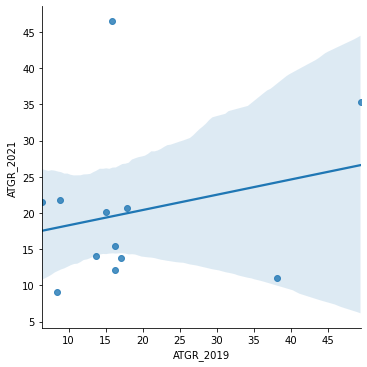

In [78]:
sns.lmplot(x='ATGR_2019',y='ATGR_2021',data=df_plot)

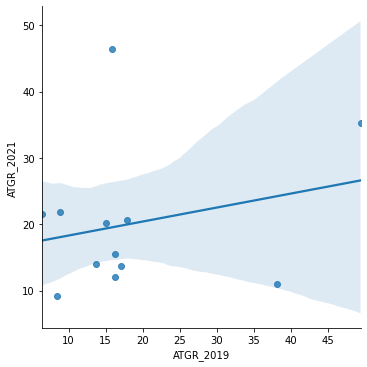

In [79]:
sns.lmplot(x='ATGR_2019',y='ATGR_2021',data=df_plot)

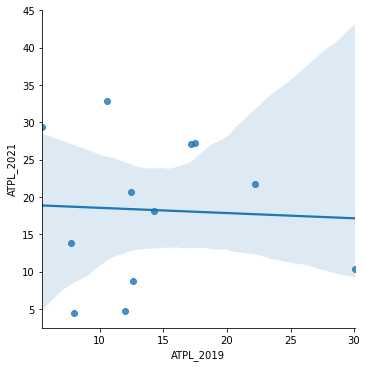

In [80]:
sns.lmplot(x='ATPL_2019',y='ATPL_2021',data=df_plot)

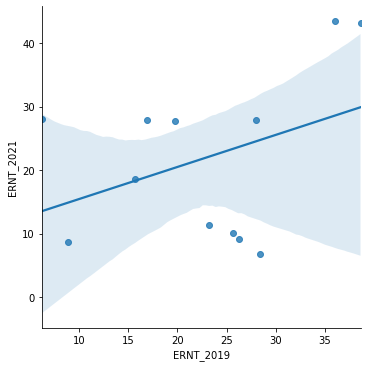

In [81]:
sns.lmplot(x='ERNT_2019',y='ERNT_2021',data=df_plot)

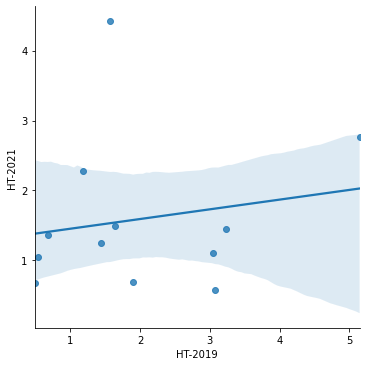

In [82]:
sns.lmplot(x='HT-2019',y='HT-2021',data=df_plot)

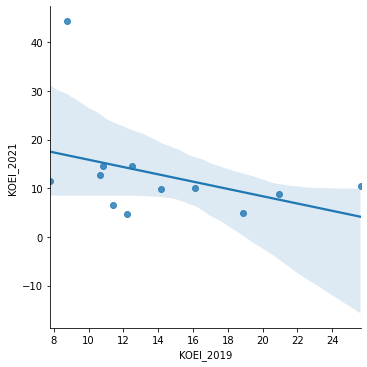

In [83]:
sns.lmplot(x='KOEI_2019',y='2021',data=df_plot)

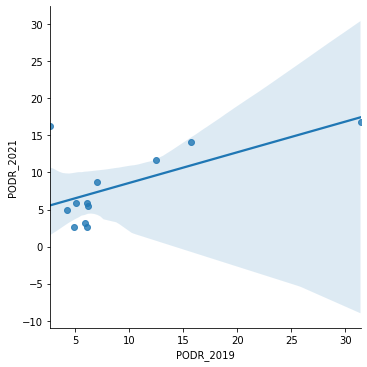

In [84]:
sns.lmplot(x='PODR_2019',y='PODR_2021',data=df_plot)

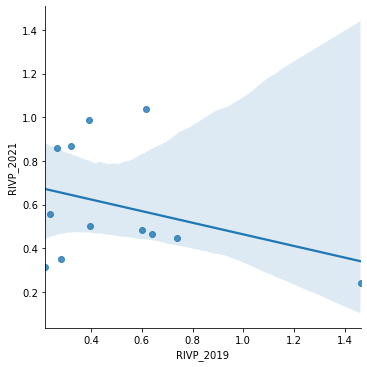

In [85]:
sns.lmplot(x='RIVP_2019',y='RIVP_2021',data=df_plot)

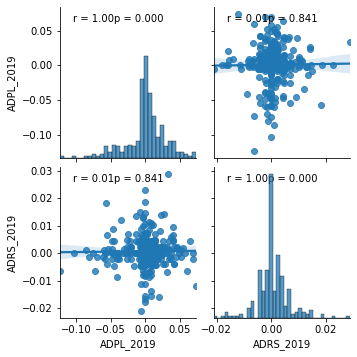

In [86]:
graph = sns.pairplot(returns[['ADPL_2019','ADRS_2019']], kind="reg", diag_kind='hist')

graph.map(corrfunc)
plt.show()
